In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to 224x224
    image = image / 255.0  # Normalize pixel values
    return image

image_folder = '/content/drive/MyDrive/Myntra_images'
preprocessed_images = []
for img_file in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_file)
    preprocessed_images.append(preprocess_image(img_path))


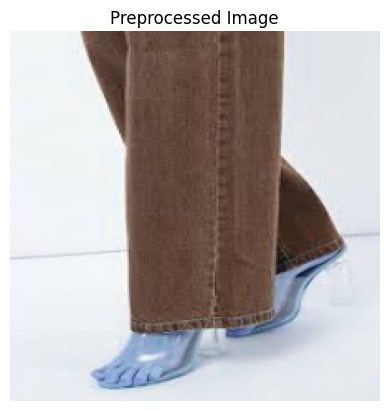

In [ ]:
import matplotlib.pyplot as plt

if preprocessed_images:
    plt.imshow(preprocessed_images[0])
    plt.title('Preprocessed Image')
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("No images found in the folder.")

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

def extract_features(img):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()  # Flatten to make it suitable for clustering

features_list = [extract_features(img) for img in preprocessed_images]

1/1 [==============================] - 1s 604ms/step


1/1 [==============================] - 1s 605ms/step


1/1 [==============================] - 1s 591ms/step


In [ ]:
if features_list:
    print("Features of the first image:")
    print(features_list[0])
else:
    print("No features extracted.")

Features of the first image:
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate synthetic timestamps
num_images = len(preprocessed_images)
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)
timestamps = [start_date + timedelta(days=x) for x in np.linspace(0, (end_date - start_date).days, num_images)]

# Create metadata with synthetic timestamps
metadata = [{'filename': f'image_{i}.jpg', 'timestamp': timestamps[i]} for i in range(num_images)]
metadata_df = pd.DataFrame(metadata)

# Combine with extracted features
features_df = pd.DataFrame(features_list)
combined_df = pd.concat([metadata_df, features_df], axis=1)

# Convert timestamp to datetime and set as index
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
combined_df.set_index('timestamp', inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


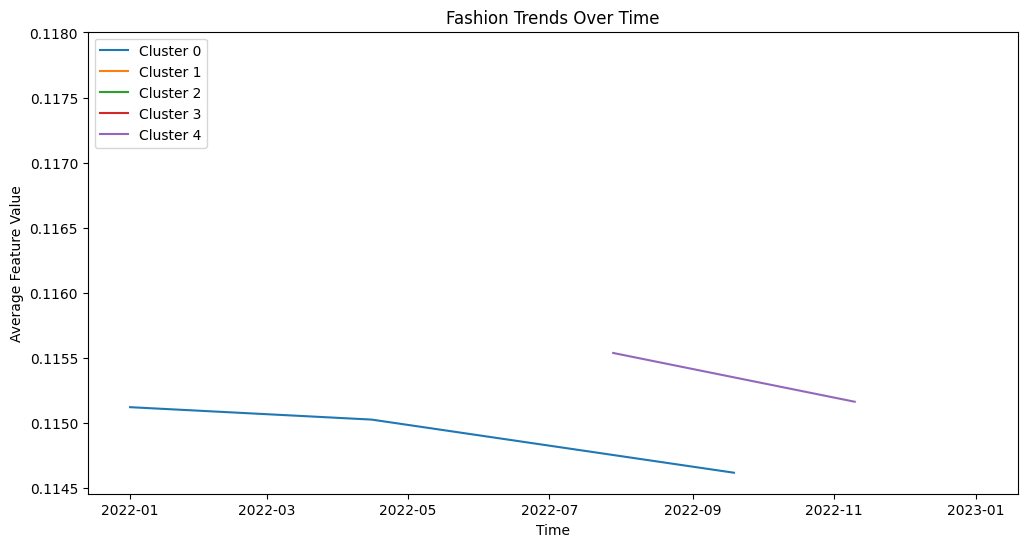

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of clusters
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(combined_df.drop(columns=['filename']))

# Plot clusters over time
plt.figure(figsize=(12, 6))
for cluster in range(num_clusters):
    cluster_data = combined_df[combined_df['cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data.drop(columns=['filename', 'cluster']).mean(axis=1), label=f'Cluster {cluster}')
plt.legend()
plt.title('Fashion Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Average Feature Value')
plt.show()
